# Census @ School Data Project
***
_Data from American Statistical Association's Census at School Website_

I currently teach several high school **statistics** classes, and I love data. I'm going to use data from my 2020 classes and data from an SRS of students in the C@S database to do a little comparison. 

## Getting to School: The Principia School Data
Below are the summary statistics for the travel times for my students. We have a boarding program at Principia so many students only have to walk a few minutes from the dorms to get to school each day. That's why Q1 = 2 minutes and the median is just 4.5 min. Only one student in my statistics classes rides the bus to school; he's the student who takes 50 minutes to get to school since it's a bus that comes from our college campus in IL. 

In [140]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('CAS_project/Getting_to_School_2020.csv')
display(df.describe())

,Travel_time_to_School
count,30.000000
mean,9.400000
std,11.349009
min,1.000000
25%,2.000000
50%,4.500000
75%,10.750000
max,50.000000


***
### Histogram: Principia School
Below is a histogram of Principia student's travel times to school. You can see that the data are strongly skewed right. Most of the students live on campus as boarders or their family lives in an on-campus apartments or rental houses.

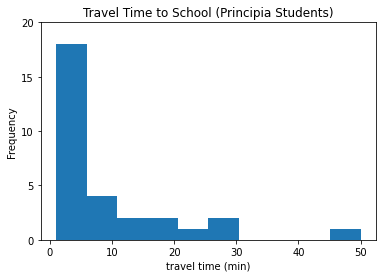

In [81]:
np_data = df.to_numpy()  # panda dataframe is converted to a numpy array
travel_time = np_data[:, 1]  # the travel time is extracted into a list that will be used to construct the histogram

plt.hist(travel_time, bins=10)
plt.title('Travel Time to School (Principia Students)')
plt.xlabel('travel time (min)')
plt.ylabel('Frequency')
plt.yticks([0, 5, 10, 15, 20])
plt.show()

***
### Pie Graph: Principia School
Next, is a pie graph that shows the modes of transportation that my statistics students use to get to school.

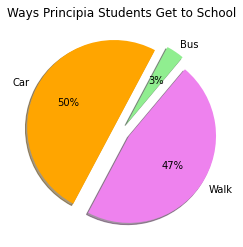

In [124]:
np_travel_type = np_data[:, 0] # First column of data from numpy array is extracted (type of travel: bus, car, walking, rail)
travel_type = np_travel_type.tolist() # The numpy data type is converted to a list so that count() method can be used.

labels_s = set(travel_type)  # create a set of the modes of travel to school
freq_dict = dict.fromkeys(labels_s, '')  # initialize dict of freq of each mode of transport
rel_freq_dict = dict.fromkeys(labels_s, '')  # initialize dict of rel freq of each mode of transport
for mode in labels_s:  # Add the frequencies to the FREQ DIST
    freq_dict[mode] = travel_type.count(mode)

sizes1 = [freq_dict[freq] for freq in freq_dict]  # List comprehension - creates a list of freq for each mode of trans from the dict.
explode1 = (0.1, 0.1, 0.1)  # This explodes each slice of the pie
colors1 = ['lightgreen', 'orange', 'violet']

plt.pie(sizes1, explode=explode1, labels=labels_s, autopct='%1.0f%%', shadow=True, startangle=50, colors = colors1)
plt.title('Ways Principia Students Get to School')
plt.show()


***
## Getting to School: A Sample from U.S. Students
_Census at School Database run by AmStat_

Here are the summary statistics for the sample of 475 randomly selected U.S. high school students taken from the Census as School database. 

_NOTE: The sample is probably not representative of ALL U.S. high school students since the database only includes data from schools that are participating in the Census at School project. Teachers voluntarily have their students answer a massive questionnaire. I imagine that there are many groups of students that are under-represented in this data and that could certainly have an impact on the mode of tranportation and travel times of students._

In [87]:
df2 = pd.read_csv('CAS_project/Getting_to_School_2018_CAS.csv')                 
display(df2.describe())

,Travel_time_to_School
count,472.000000
mean,15.328390
std,12.683649
min,1.000000
25%,7.000000
50%,12.000000
75%,20.000000
max,120.000000


***
### Histogram: A Sample of U.S. Students
Below is a histogram of the travel times to school for a random sample of high school students from the _Census at School (C@S)_ website. You can see that the data are strongly skewed right. 

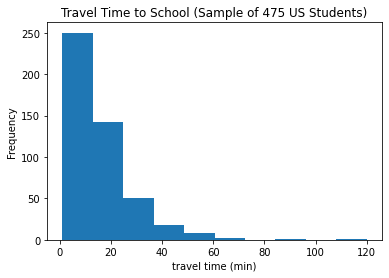

In [88]:
np_data_US = df2.to_numpy()
travel_time_US = np_data_US[:, 1]

plt.hist(travel_time_US, bins=10)
plt.title('Travel Time to School (Sample of 475 US Students)')
plt.xlabel('travel time (min)')
plt.ylabel('Frequency')
plt.show()

***
### Pie Graph: A Sample of U.S. Students
Next, is a pie graph that shows the modes of transportation that the students in the sample from _C@S_ uses to get to school.

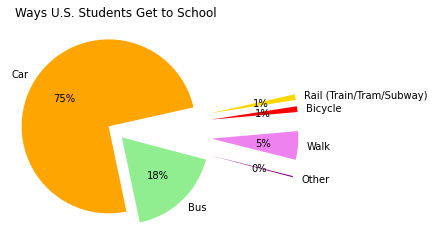

In [125]:
np_travel_type_US = np_data_US[:, 0] # First column of data from numpy array is extracted (type of travel: bus, car, walking, rail)
travel_type_US = np_travel_type_US.tolist() # The numpy data type is converted to a list so that count() method can be used.
 
labels_s_US = set(travel_type_US)  # create a set of the modes of travel to school

freq_dict_US = dict.fromkeys(labels_s_US, '')  # initialize dict of freq of each mode of transport
for mode in labels_s_US:  # Add the frequencies to the FREQ DIST
    freq_dict_US[mode] = travel_type_US.count(mode)

sizes2 = [freq_dict_US[freq] for freq in freq_dict_US]  # creates a list of freq for each mode of trans from the dict.
explode2 = (0.3, 0.3, 0.1, 0.3, 0.3, 0.3)  # This explodes each slice of the pie
colors2 = ['red', 'gold', 'orange', 'lightgreen', 'purple', 'violet']

plt.pie(sizes2, explode = explode3, labels = labels_s_US, autopct='%1.0f%%', startangle= 5, colors = colors2)
plt.title('Ways U.S. Students Get to School')
plt.show()

***
## Comparison

I'll now show the datagraphics side by side for comparison.

### The Histograms:

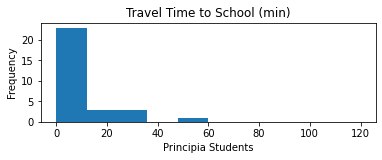

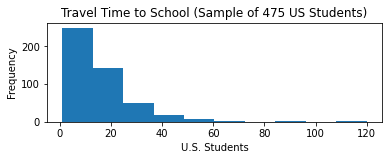

In [128]:
plt.subplot(2, 1, 1)
plt.hist(travel_time, bins=10, range=(0,120))
plt.title('Travel Time to School (min)')
plt.xlabel('Principia Students')
plt.ylabel('Frequency')
plt.yticks([0, 5, 10, 15, 20])
plt.show()


plt.subplot(2, 1, 2)
plt.hist(travel_time_US, bins=10)
plt.title('Travel Time to School (Sample of 475 US Students)')
plt.xlabel('U.S. Students')
plt.ylabel('Frequency')
plt.show()

In [142]:
print("\nPrincipia Mean Travel Time = " + str(round(df['Travel_time_to_School'].mean(),1)) + " min")
print("U.S. Student Mean Travel Time = " + str(round(df2['Travel_time_to_School'].mean(),1)) + " min \n")

print("Principia Median Travel Time = " + str(round(df['Travel_time_to_School'].median(),1)) + " min")
print("U.S. Student Median Travel Time = " + str(round(df2['Travel_time_to_School'].median(),1)) + " min \n")


Principia Mean Travel Time = 9.4 min
U.S. Student Mean Travel Time = 15.3 min 

Principia Median Travel Time = 4.5 min
U.S. Student Median Travel Time = 12.0 min 



It's pretty clear that Principia students typically have a shorter commute to school than other U.S. students (at least the types of students who participate in the Census @ School project). As you can see below, far more Principia students walk to school and far fewer take the bus to school than other U.S. students. In fact, the only bus service that is offered is for students of that are children of Principia College facutly and staff in Elsah, IL. 

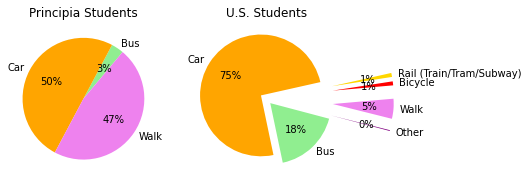

In [126]:
plt.subplot(1, 2, 1)
plt.pie(sizes1, labels = labels_s, autopct='%1.0f%%', startangle=50, colors = colors1)
plt.title('Principia Students')

explode3 = (1.1, 1.1, 0.1, 0.1, 1.1, 1.1)  # This explodes each slice of the pie

plt.subplot(1, 2, 2)
plt.pie(sizes2, explode = explode3, labels = labels_s_US, autopct='%1.0f%%', startangle= 5, colors = colors2)
plt.title('U.S. Students')
plt.show()